# Prediction of Doctor's Consultation Fee :


## Information about dataset :

FEATURES:


Qualification: Qualification and degrees held by the doctor


Experience: Experience of the doctor in number of years


Rating: Rating given by patients


Profile: Type of the doctor


Miscellaeous_Info: Extra information about the doctor


Place: Area and the city where the doctor is located.


Fees: Fees charged by the doctor (Target)

### Importing Required library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

As our data is in excel format so we will use pd.read_excel function for get the data.

In [2]:
doc_train = pd.read_excel("Final_Train.xlsx")
doc_test = pd.read_excel("Final_Test.xlsx")

In [3]:
doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
doc_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
doc_train.shape , doc_test.shape

((5961, 7), (1987, 6))

### Data Preprocessing

In [6]:
doc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
doc_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [8]:
doc_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
doc_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

Except the target variable all our data is in catagorical form of data, so before going forward we need to convert it into numerical form.

In [10]:
doc_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

As we can see there are many null values present in our dataset.

So here we have 3302 null values present in Rating column, 25 in place, and 2620 null values under Miscellaneous_Info.

###### Place

In [11]:
doc_train.Place.fillna('none,none',inplace=True)

doc_train['location'] = doc_train['Place'].str.split(",").str[0]
doc_train['city'] = doc_train['Place'].str.split(",").str[1]



In [12]:
doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,location,city
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [13]:
#Now we can drop the place variable
doc_train.drop('Place',axis=1,inplace=True)

In [14]:
doc_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,location,city
0,"BHMS, MD - Homeopathy",24 years experience,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


###### Experience

In [15]:
doc_train['Experience'] = doc_train['Experience'].str.split().str[0]
doc_train['Experience'] = doc_train['Experience'].astype(int)


In [16]:
doc_train.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,location,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


###### Rating

In [17]:
doc_train['Rating'].fillna('-99%', inplace=True)

# extract value of rating to avoid '%' and convert to numeric
doc_train['Rating'] = doc_train['Rating'].str.slice(stop=-1).astype(int)

In [18]:
print("0-10% ",len(doc_train[(doc_train['Rating']>0) & (doc_train['Rating']<=10)]))
print("11-20% ",len(doc_train[(doc_train['Rating']>10) & (doc_train['Rating']<=20)]))
print("21-30% ",len(doc_train[(doc_train['Rating']>20) & (doc_train['Rating']<=30)]))
print("31-40% ",len(doc_train[(doc_train['Rating']>30) & (doc_train['Rating']<=40)]))
print("And so-on..")

0-10%  1
11-20%  0
21-30%  0
31-40%  4
And so-on..


In [19]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
doc_train['Rating'] = pd.cut(doc_train['Rating'], bins=bins, labels=labels, include_lowest=True)


In [20]:
doc_train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [21]:
doc_train.tail()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,location,city
5956,"MBBS, MS - ENT",19,10,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore
5957,MBBS,33,0,General Medicine,NaN,100,Nungambakkam,Chennai
5958,MBBS,41,10,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15,9,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai
5960,"BDS, MDS - Orthodontics",17,10,Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200,Pitampura,Delhi


###### Qualification

In [22]:
doc_train['Qualification'].nunique()

1420

In [23]:
print(doc_train['Qualification'])

0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5956                    MBBS, MS - ENT
5957                              MBBS
5958                              MBBS
5959       MBBS, MD - General Medicine
5960           BDS, MDS - Orthodontics
Name: Qualification, Length: 5961, dtype: object


In [24]:
 doc_train['Qualification'].value_counts()[:35]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

MBBS,BDS,BAMS,MD,BHMS,Fellowship,DLO,MLO,DNB,DDVL,MS these qualifications are present in a very high number. 
So, we are going to add features of those and add values '1' or '0' as if they are present or not.

In [25]:
def fun(arr,string):
  for data in dat:
    if data.find(string) !=-1:
      arr.append(int(1))
    else :
      arr.append(int(0))
def to_df(lst):
  lst=pd.DataFrame(lst)
  return lst

cols=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']

In [26]:
# doc_train1 = doc_train["Qualification"]
# doc_train1

In [27]:
dat=doc_train["Qualification"]

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mlo=[]
dnb=[]
ddvl=[]
ms=[]

fun(mbbs,'MBBS')
fun(bds,'BDS')
fun(bams,'BAMS')
fun(md,'MD')
fun(bhms,'BHMS')
fun(fellowship,'Fellowship')
fun(dlo,'DLO')
fun(mlo,'MLO')
fun(dnb,'DNB')
fun(ddvl,'DDVL')
fun(ms,'MS')

mbbs = to_df(mbbs)
bds = to_df(bds)
bams = to_df(bams)
md = to_df(md)
bhms = to_df(bhms)
fellowship = to_df(fellowship)
dlo = to_df(dlo)
mlo = to_df(mlo)
dnb = to_df(dnb)
ddvl = to_df(ddvl)
ms = to_df(ms)

doc_train.drop('Qualification',axis =1,inplace=True)
doc_train = pd.concat([mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,doc_train],axis=1)

mx = doc_train.columns[11:]
for i in mx:
  cols.append(i)
doc_train.columns=cols
doc_train.head()


,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,location,city
0,0,1,0,0,0,0,0,0,1,1,0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [28]:
doc_train['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'none',
       ' Sector 5', nan], dtype=object)

In [29]:
import re
doc_train['city'] = doc_train['city'].apply(lambda x: re.sub(' +','',str(x)))

In [30]:
doc_train["city"].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
none                    25
nan                      1
Sector5                  1
Name: city, dtype: int64

In [31]:
# city contains some improper data.
doc_train[(doc_train['city'] == "nan") | (doc_train['city'] == "Sector5")]

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,location,city
2169,0,0,0,0,0,0,0,1,0,0,0,11,0,Dentist,NaN,250,Dwarka,Sector5
3980,0,0,0,0,0,0,0,1,0,0,0,23,0,Dentist,NaN,250,e,nan


In [32]:
doc_train['city'] = np.where(doc_train['city']=="Sector5","Delhi", doc_train['city'])

#nan
doc_train['city'].loc[3980] = "none"
doc_train['location'].loc[3980] = "none"


In [33]:
doc_train.head(10)

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,location,city
0,0,1,0,0,0,0,0,0,1,1,0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
5,0,0,1,0,0,0,0,0,0,1,0,8,0,Ayurveda,NaN,100,Porur,Chennai
6,0,1,0,0,0,0,0,0,0,1,0,42,0,Homeopath,NaN,200,Karol Bagh,Delhi
7,0,0,0,0,0,0,0,1,0,0,0,10,10,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,Arekere,Bangalore
8,1,0,0,0,0,0,0,0,1,0,0,14,0,General Medicine,NaN,100,Old City,Hyderabad
9,0,0,0,0,0,0,0,1,0,0,0,23,0,Dentist,NaN,100,Athani,Ernakulam


In [34]:
doc_train.groupby('city')['location'].nunique()

city
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Thiruvananthapuram     48
none                    1
Name: location, dtype: int64

In [35]:
doc_train.head(2)

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,location,city
0,0,1,0,0,0,0,0,0,1,1,0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


### Exploratory Data Analysis

Lets check the relationship between diff columns to target variable for better understanding.

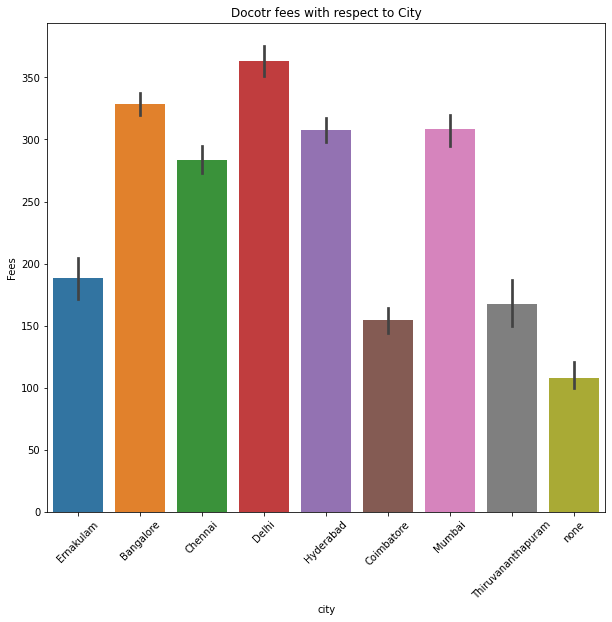

In [36]:
#Citywise doctor fee rate
plt.figure(figsize = (10,9))
sns.barplot(x = "city", y = "Fees", data = doc_train)
plt.xticks(rotation = 45)
plt.title("Docotr fees with respect to City")
plt.show()

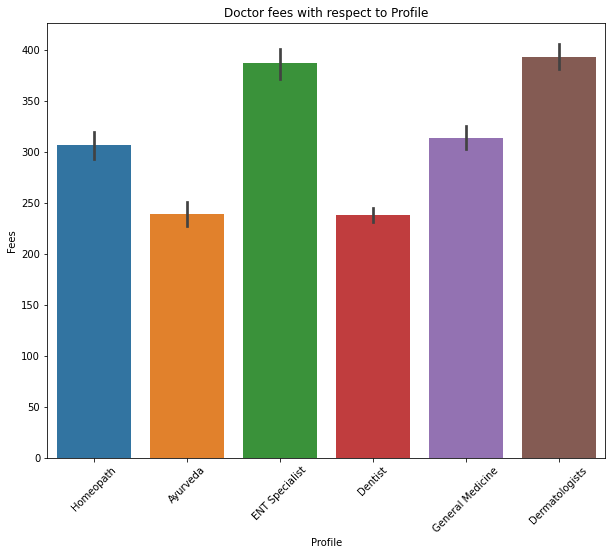

In [37]:
#Doctors fees by profile
plt.figure(figsize = (10,8))
sns.barplot(x = 'Profile', y = 'Fees', data=doc_train)
plt.xticks(rotation=45)
plt.title("Doctor fees with respect to Profile")
plt.show()

As per above plots we are come to know that doctors who belongs to metropolean cities like Bangalore, Chennai,Delhi,Hyderabad,Mumbai are took high amount of fees as compare to other city.

Whereas doctors with specialization of Dermetologies, Homeopathy and ENT specialists charges more fees among all other doctors.

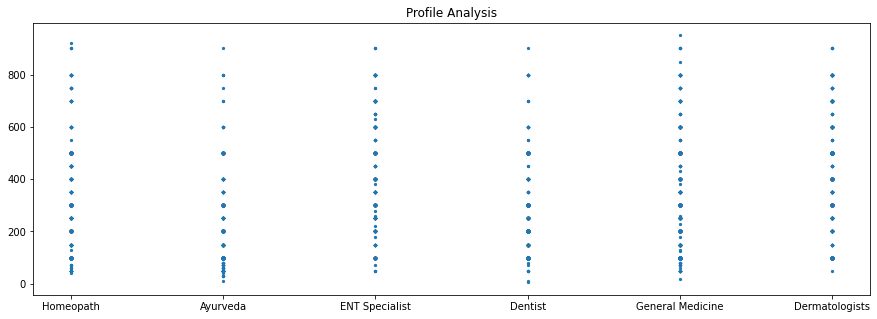

In [38]:
plt.figure(figsize=(15,5))
plt.title('Profile Analysis')

plt.scatter(doc_train['Profile'],doc_train['Fees'],s=5)
plt.show()


Mostly fees ranges between 0 to 400 in every specialization.


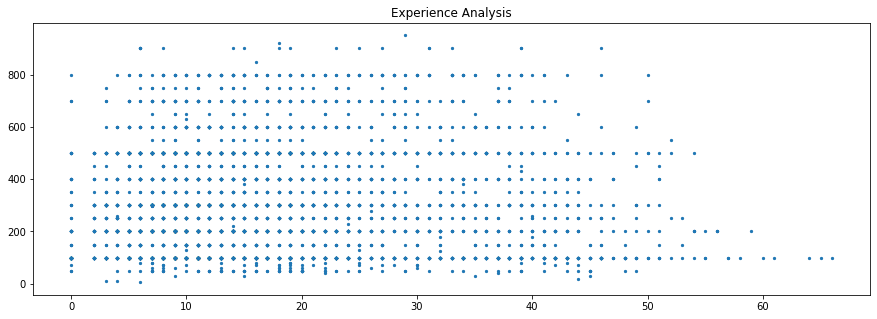

In [39]:
plt.figure(figsize=(15,5))
plt.title('Experience Analysis')

plt.scatter(doc_train['Experience'],doc_train['Fees'],s=5)
plt.show()

The experience is not much correlated with fees

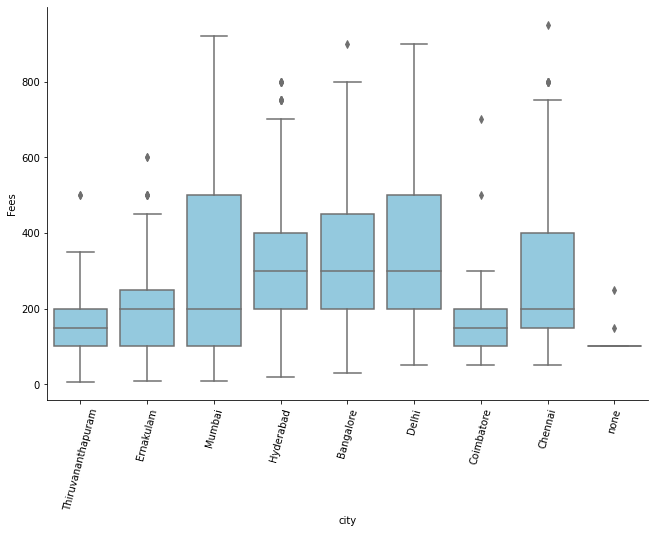

In [40]:
sns.catplot(x='city',y='Fees', data=doc_train.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='skyblue')
plt.xticks(rotation=75)
plt.show()

In [41]:
doc_train = pd.get_dummies(doc_train,columns=['city','Profile'], prefix=['City','Profile'])

In [42]:
doc_train.head(10)

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_none,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


Miscellaneous_Info column consists data which we have already using like city, rating and profile so better to drop this column.

Location and city represents approximatly the same relationship so we can drop location column as well.

In [43]:
doc_train.drop(["Miscellaneous_Info","location"], axis=1, inplace=True)

In [44]:
doc_train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_none,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


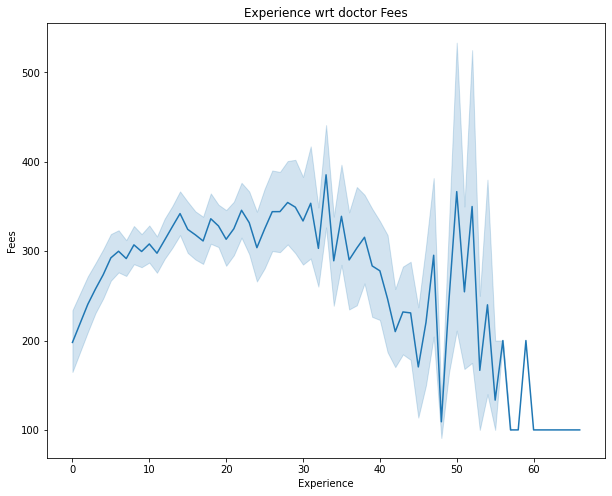

In [45]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=doc_train)
ax.set_title("Experience wrt doctor Fees")
plt.show()

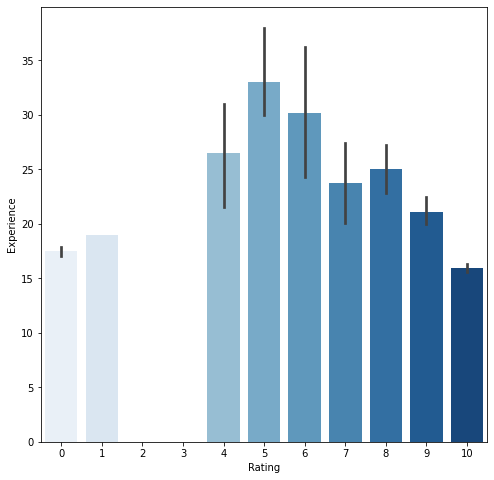

In [46]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=doc_train,palette='Blues')
plt.show()

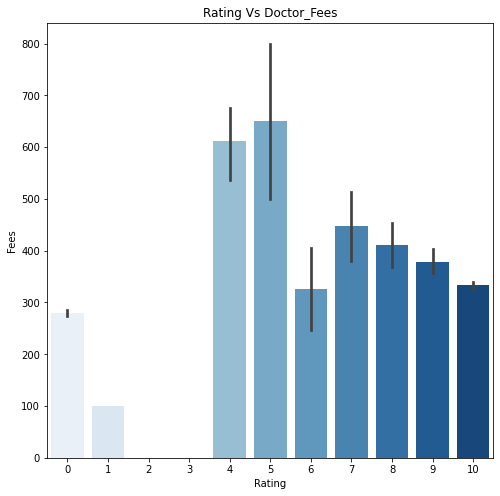

In [47]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=doc_train,palette='Blues')
plt.title("Rating Vs Doctor_Fees")
plt.show()

As we have grouped the rating in 10 bins, eg: bin5 will be rating of 41-50%.


As, we can see that High rating does not relate to high fees charged, infact low fees can be reason of high rating and where fees are charged so high, there rating is between 30-60%.


### Test Dataset


In [48]:
#Place column (Extract city and locality in diff column)
doc_test.Place.fillna('none,none',inplace=True)

doc_test['location'] = doc_test['Place'].str.split(",").str[0]
doc_test['city'] = doc_test['Place'].str.split(",").str[1]
#drop place column
doc_test.drop('Place',axis=1,inplace=True)

# EXPERIENCE COLUMN
doc_test['Experience'] = doc_test['Experience'].str.split().str[0]
doc_test['Experience'] = doc_test['Experience'].astype(int)


#Rating column
doc_test['Rating'].fillna('-99%',inplace=True)
doc_test['Rating'] = doc_test['Rating'].str.slice(stop=-1).astype(int)
# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
doc_test['Rating'] = pd.cut(doc_test['Rating'], bins=bins, labels=labels, include_lowest=True)


In [49]:
#Qualification Column
def fun(arr,string):
  for data in dat:
    if data.find(string) !=-1:
      arr.append(int(1))
    else :
      arr.append(int(0))
def to_df(lst):
  lst=pd.DataFrame(lst)
  return lst

cols=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']

dat=doc_test["Qualification"]

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mlo=[]
dnb=[]
ddvl=[]
ms=[]

fun(mbbs,'MBBS')
fun(bds,'BDS')
fun(bams,'BAMS')
fun(md,'MD')
fun(bhms,'BHMS')
fun(fellowship,'Fellowship')
fun(dlo,'DLO')
fun(mlo,'MLO')
fun(dnb,'DNB')
fun(ddvl,'DDVL')
fun(ms,'MS')

mbbs = to_df(mbbs)
bds = to_df(bds)
bams = to_df(bams)
md = to_df(md)
bhms = to_df(bhms)
fellowship = to_df(fellowship)
dlo = to_df(dlo)
mlo = to_df(mlo)
dnb = to_df(dnb)
ddvl = to_df(ddvl)
ms = to_df(ms)

doc_test.drop('Qualification',axis =1,inplace=True)
doc_test = pd.concat([mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,doc_test],axis=1)

mx = doc_test.columns[11:]
for i in mx:
  cols.append(i)
doc_test.columns=cols
doc_test.head()



,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,location,city
0,1,0,0,0,0,0,0,0,0,0,0,35,0,General Medicine,NaN,Ghatkopar East,Mumbai
1,1,0,0,0,1,0,0,0,0,0,0,31,0,ENT Specialist,NaN,West Marredpally,Hyderabad
2,1,0,0,1,0,0,0,0,0,0,0,40,7,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,0,0,1,0,0,0,0,0,0,1,0,0,0,Ayurveda,NaN,New Ashok Nagar,Delhi
4,0,0,0,0,0,0,0,1,1,0,0,16,10,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [50]:
#city column
doc_test['city'] = doc_test['city'].apply(lambda x: re.sub(' +','',str(x)))

In [51]:
#Encode City and Profile

doc_test = pd.get_dummies(doc_test, columns=['city','Profile'], prefix=['City','Profile'])


In [52]:
#drop Miscellaneous_Info and location
doc_test.drop(['Miscellaneous_Info','location'], axis=1, inplace=True)


In [123]:
doc_train.nunique()

mbbs                         2
bhms                         2
bams                         2
ddvl                         2
dlo                          2
mlo                          1
dnb                          2
bds                          2
md                           2
ms                           2
fellowship                   2
Experience                  64
Rating                       9
Fees                        40
City_Bangalore               2
City_Chennai                 2
City_Coimbatore              2
City_Delhi                   2
City_Ernakulam               2
City_Hyderabad               2
City_Mumbai                  2
City_Thiruvananthapuram      2
City_none                    2
Profile_Ayurveda             2
Profile_Dentist              2
Profile_Dermatologists       2
Profile_ENT Specialist       2
Profile_General Medicine     2
Profile_Homeopath            2
dtype: int64

### Feature Scaling

In [75]:
X = doc_train.drop('Fees',axis=1)

Y = doc_train['Fees']

In [109]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [110]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [111]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4172, 28), (1789, 28), (4172,), (1789,))

In [112]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((4172, 28), (1789, 28), (4172,), (1789,))

### Model Building

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [130]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [172]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
lg_reg = LogisticRegression()

model = [knn_reg, svm_reg, dt_reg, rf_reg, lg_reg]

In [173]:
for reg in model:
    reg.fit(X_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))
    print("\n***************************************************************************************\n")

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') 0.5812271618453946

***************************************************************************************

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 0.7614954539957495

***************************************************************************************

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 0.5315669392869751

****************************

SVM is giving high score from all of above models. So we will do HyperParameter Tuning for SVM.



## HyperParameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [178]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])

svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=200, verbose=1, n_jobs=-1)
svm_random.fit(X_train,y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   26.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=make_scorer(score),
                   verbose=1)

In [179]:
print("Best Score:",svm_random.best_score_)
print("Best Parameters:\n",svm_random.best_params_)

Best Score: 0.807466819820867
Best Parameters:
 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}


In [180]:
# predict the test data from it and see the result
predictions = svm_random.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.7556898456231949


### Serialization

In [182]:
import joblib
joblib.dump(svm_random,"Doctors fees SVM.pkl")

['Doctors fees SVM.pkl']